Após a aplicação do ENEM 2018, surgiram muitas discussões sobre o tema da redação: "Manipulação do comportamento do usuário pelo controle de dados na Internet”. Essas discussões giravam em torno do fato do tema não ser simples e exigir o mínimo de informação sobre algo que não é de conhecimento comum pelo Brasil, o que geraria uma maior segregação dos participantes na nota. Como um candidato que reside no interior, de situação socioeconômica frágil e sem acesso a meios de comunicação e tecnologias pode dissertar sobre manipulação do comportamento do usuário pelo controle de dados na internet? 

Diante disso, analisaremos as notas de redação de 2018 e dos 3 anos anteriores (limitamos a 3 anos por causa da quantidade massiva de dados) buscando ver se de fato houve uma diferença e se ela pode ser decorrente do tema.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

In [2]:
path = 'enem_small_data/'
file = 'Microdados_ENEM_Amostra_'

In [3]:
# Função auxiliar para dispor dataframes lado a lado

def display_dfs(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.head().to_html(index=False)}</td>' 
                         for df in dfs) + 
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [4]:
plt.ion()
plt.rcParams['figure.figsize']  = (8, 5)
sns.set_style('darkgrid')
sns.set_context('notebook')

## 1. Análise exploratória dos dados

In [5]:
df2018 = pd.read_csv(path+file+'2018.csv', sep=',',  encoding='latin-1', usecols=['NU_NOTA_REDACAO']).dropna()
df2017 = pd.read_csv(path+file+'2017.csv', sep=',',  encoding='latin-1', usecols=['NU_NOTA_REDACAO']).dropna()
df2016 = pd.read_csv(path+file+'2016.csv', sep=',',  encoding='latin-1', usecols=['NU_NOTA_REDACAO']).dropna()
df2015 = pd.read_csv(path+file+'2015.csv', sep=',',  encoding='latin-1', usecols=['NU_NOTA_REDACAO']).dropna()

In [6]:
dfs = list([df2018, df2017, df2016, df2015])

In [7]:
display_dfs(dfs, ['2018', '2017', '2016', '2015'])

2018 2017 2016 2015 
 
 
 NU_NOTA_REDACAO 
 
 
 
 
 320.0 
 
 
 500.0 
 
 
 340.0 
 
 
 860.0 
 
 
 480.0 
 
 
 
 
 
 NU_NOTA_REDACAO 
 
 
 
 
 560.0 
 
 
 700.0 
 
 
 440.0 
 
 
 580.0 
 
 
 300.0 
 
 
 
 
 
 NU_NOTA_REDACAO 
 
 
 
 
 580.0 
 
 
 540.0 
 
 
 380.0 
 
 
 520.0 
 
 
 680.0 
 
 
 
 
 
 NU_NOTA_REDACAO 
 
 
 
 
 760.0 
 
 
 600.0 
 
 
 620.0 
 
 
 540.0 
 
 
 560.0

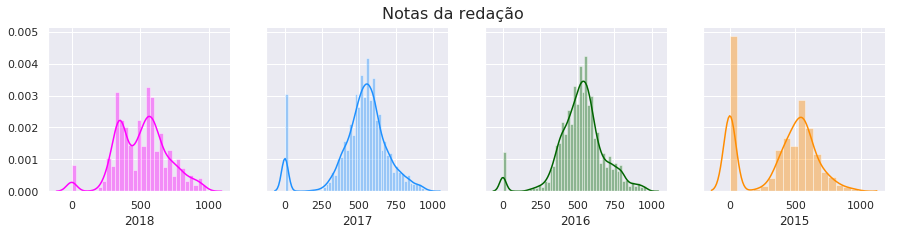

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
colors = ['fuchsia', 'dodgerblue', 'darkgreen', 'darkorange']
for i in range(len(dfs)):
    sns.distplot(dfs[i], color = colors[i], ax = axes[i], axlabel = str(2018-i))
fig.suptitle(("Notas da redação"), fontsize=16)
sns.despine()
plt.show()

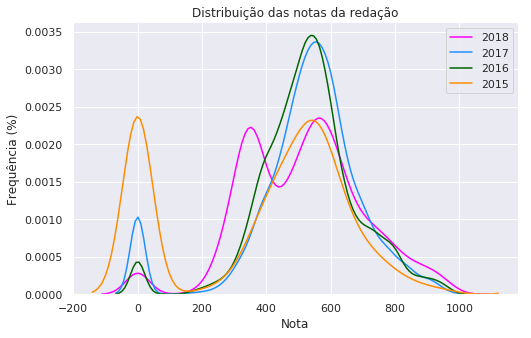

In [9]:
for i in range(len(dfs)):    
    #sns.kdeplot(dfs[i], color = colors[i], label = str(2018-i))  Começou a dar erro do nada, não soube o que é
    sns.distplot(dfs[i], color = colors[i], hist = False, label = str(2018-i))
plt.title('Distribuição das notas da redação')
plt.xlabel('Nota')
plt.ylabel('Frequência (%)')
plt.legend()
sns.despine()
plt.show()

Como pode ser observado, as notas em 2015 tiveram uma quantidade muito grande de redações zeradas. Essas notas 0 atrapalham a análise porque, além dos critérios que levam ao 0 terem mudado em 2018 e alguns poderem ser afetados por fatores externos (como quantidade de ausências no exame), em 2015 as ausências também eram contabilizadas como 0, mas nos anos subsequentes entraram como NaN. Assim, retiramos, além dos nulos, as notas 0 da análise.

In [10]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].loc[(dfs[i]!=0).any(axis=1)]

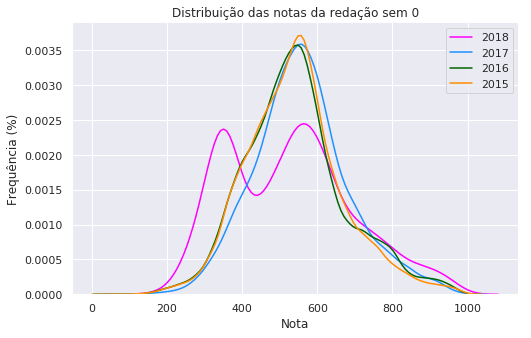

In [11]:
for i in range(len(dfs)):
    sns.distplot(dfs[i], color = colors[i], hist = False, label = str(2018-i))
plt.title('Distribuição das notas da redação sem 0')
plt.xlabel('Nota')
plt.ylabel('Frequência (%)')
plt.legend()
sns.despine()
plt.show()

Apenas com a visualização acima, já conseguimos perceber que a ditribuição das notas de 2018 foi bimodal, ao contrário dos outros anos. Paralelamente, é possível notar um aumento no número de notas muito altas e de notas muito baixas.

## 2. Teste de Hipótese

Primeiramente, concatenamos todos os dataframes em um só para realizar um teste de permutação. Permutando as notas e guardando a diferença da estatística em análise (média e desvio padrão) entre o que corresponderia a 2018 e antes, conseguimos simular diferenças ocorridas devido ao caso. Aqui, a hipótese nula é que a diferença entre as notas de 2018 e os demais anos é aleatória. Para isso, analisamos, além da média, o desvio padrão, o que permite entender o quanto as notas foram diferentes entre si.

### 2.1 Média

In [12]:
df = pd.concat(dfs, ignore_index=True)
dif_obs_media = df['NU_NOTA_REDACAO'][len(df2018):].mean() - df['NU_NOTA_REDACAO'][:len(df2018)].mean()
print('Diferença observada: ', dif_obs_media)

Diferença observada:  18.014582995877163


In [13]:
N = 10000
dif_media = np.zeros(N)
notas = df['NU_NOTA_REDACAO'].values
n_2018 = len(df2018)
for i in range(N):
    np.random.shuffle(notas)
    dif_media[i] = notas[n_2018:].mean() - notas[:n_2018].mean()
p_value_media = np.percentile(dif_media,95)

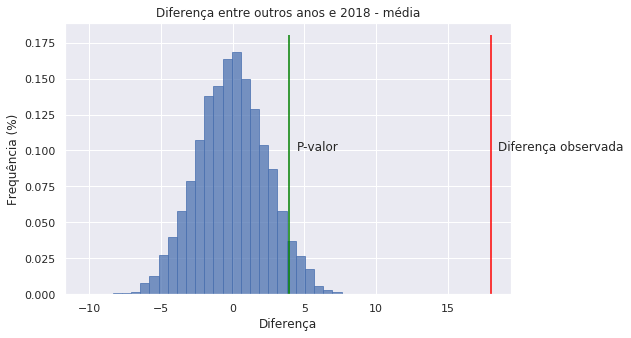

In [14]:
sns.set()
plt.hist(dif_media, bins=30, density = True, edgecolor='b', alpha = 0.75)
plt.title('Diferença entre outros anos e 2018 - média')
plt.xlabel('Diferença')
plt.ylabel('Frequência (%)')
plt.vlines(dif_obs_media, 0, 0.18, color='red')
plt.text(dif_obs_media+0.5, 0.10, 'Diferença observada')
plt.vlines(p_value_media, 0, 0.18, color='green')
plt.text(p_value_media+0.5, 0.10, 'P-valor')
plt.show()

### 2.2 Desvio padrão

In [15]:
df = pd.concat(dfs, ignore_index=True)
dif_obs_std = df['NU_NOTA_REDACAO'][len(df2018):].std(ddof=1) - df['NU_NOTA_REDACAO'][:len(df2018)].std(ddof=1)
print('Diferença observada: ', dif_obs_std)

Diferença observada:  -37.011552334502824


In [16]:
N = 10000
dif_std = np.zeros(N)
notas = df['NU_NOTA_REDACAO'].values
n_2018 = len(df2018)
for i in range(N):
    np.random.shuffle(notas)
    dif_std[i] = notas[n_2018:].std(ddof=1) - notas[:n_2018].std(ddof=1)
p_value_std = np.percentile(dif_std,5)

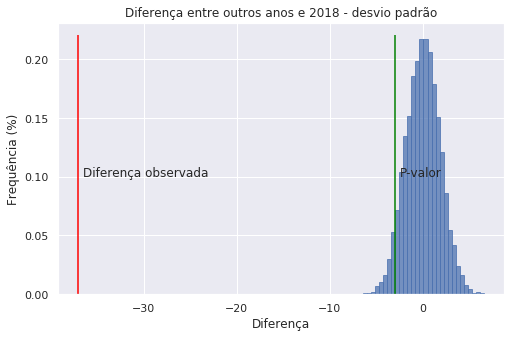

In [17]:
plt.hist(dif_std, bins=30, density = True, edgecolor='b', alpha = 0.75)
plt.title('Diferença entre outros anos e 2018 - desvio padrão')
plt.xlabel('Diferença')
plt.ylabel('Frequência (%)')
plt.vlines(dif_obs_std, 0, 0.22, color='red')
plt.text(dif_obs_std+0.5, 0.10, 'Diferença observada')
plt.vlines(p_value_std, 0, 0.22, color='green')
plt.text(p_value_std+0.5, 0.10, 'P-valor')
plt.show()

Como se pode ver, nos dois casos rejeitamos fortemente a hipótese nula, indicando que a diferença nas notas de redação de 2018 para os anos anteriores observados não pode ser estatisticamente considerada aleatória, sendo este um indício de que o tema da redação de fato segregou os alunos.